In [2]:
import numpy as np
from numpy.linalg import eigvals
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import LogNorm
from matplotlib.animation import FuncAnimation as FA

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

In [3]:
D11 = lambda phi, a, x, c:\
    -(
        + 2*(phi[0] - c[0, 0])**2 
        + 2*(phi[0] - c[0, 1])**2 
        + 8*(phi[0] - c[0, 0])*(phi[0] - c[0, 1]) 
        + 2*x[1]*phi[1]**2
    )+0j
D22 = lambda phi, a, x, c: \
    -(
        + 2*(phi[1] - c[1, 0])**2 
        + 2*(phi[1] - c[1, 1])**2 
        + 8*(phi[1] - c[1, 0])*(phi[1] - c[1, 1])
        + 2*x[1]*phi[0]**2
    )+0j
D12 = lambda phi, a, x, c: -((x[0] + a) + 4*x[1]*phi[0]*phi[1])+0j
D21 = lambda phi, a, x, c: -((x[0] - a) + 4*x[1]*phi[0]*phi[1])+0j


def D0(phi, a, x, c):
    D = np.matrix([
        [D11(phi, a, x, c), D12(phi, a, x, c)], 
        [D21(phi, a, x, c), D22(phi, a, x, c)]])
    return D

In [4]:
l1 = lambda phi, a : 1/2 * ( (D11(phi, a, x, c) + D22(phi, a, x, c)) + np.sqrt((D11(phi, a, x, c) - D22(phi, a, x, c))**2 + 4*D12(phi, a, x, c)*D21(phi, a, x, c) ) )
l2 = lambda phi, a : 1/2 * ( (D11(phi, a, x, c) + D22(phi, a, x, c)) - np.sqrt((D11(phi, a, x, c) - D22(phi, a, x, c))**2 + 4*D12(phi, a, x, c)*D21(phi, a, x, c) ) )

0.0


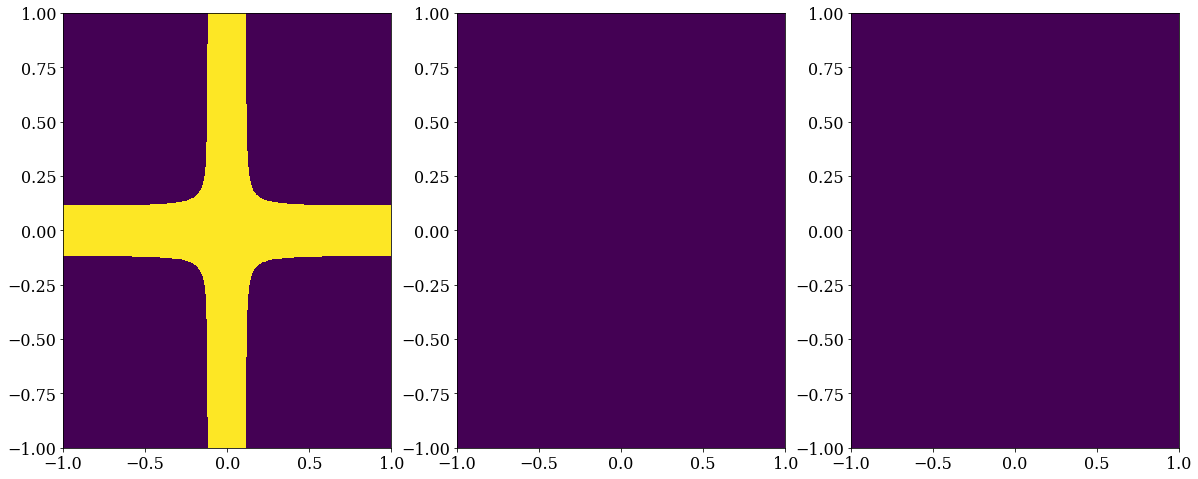

0.07142857142857142


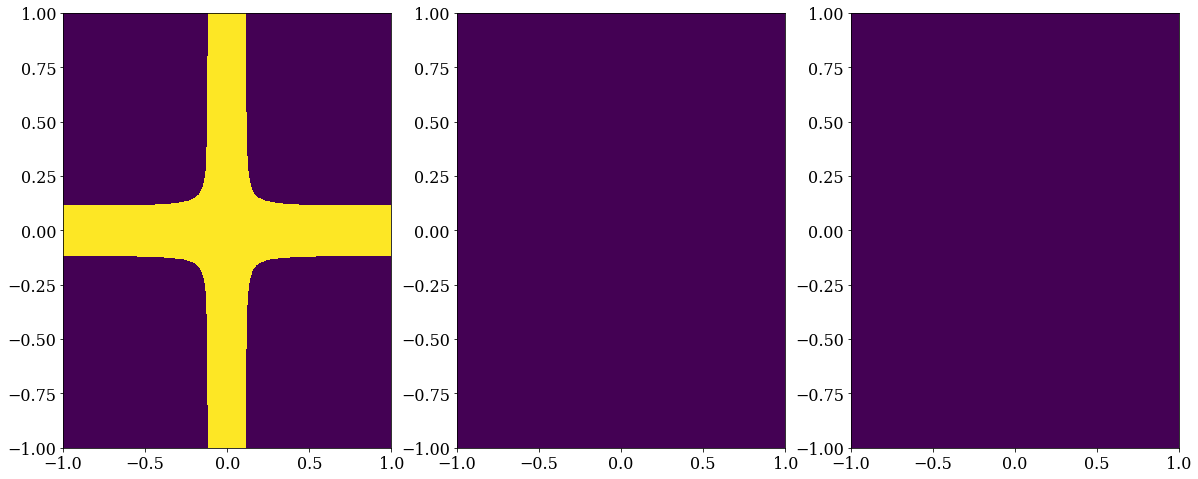

0.14285714285714285


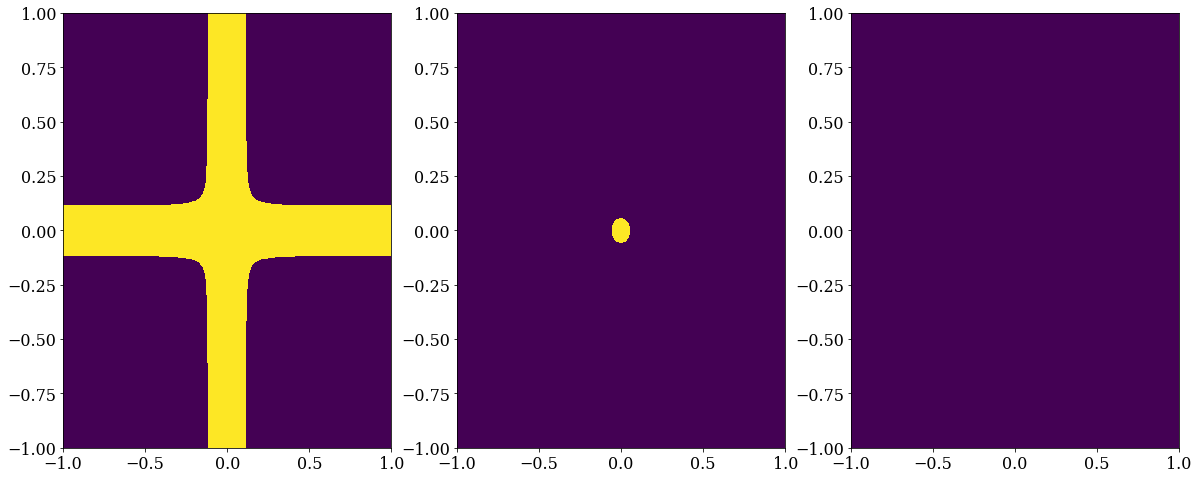

0.21428571428571427


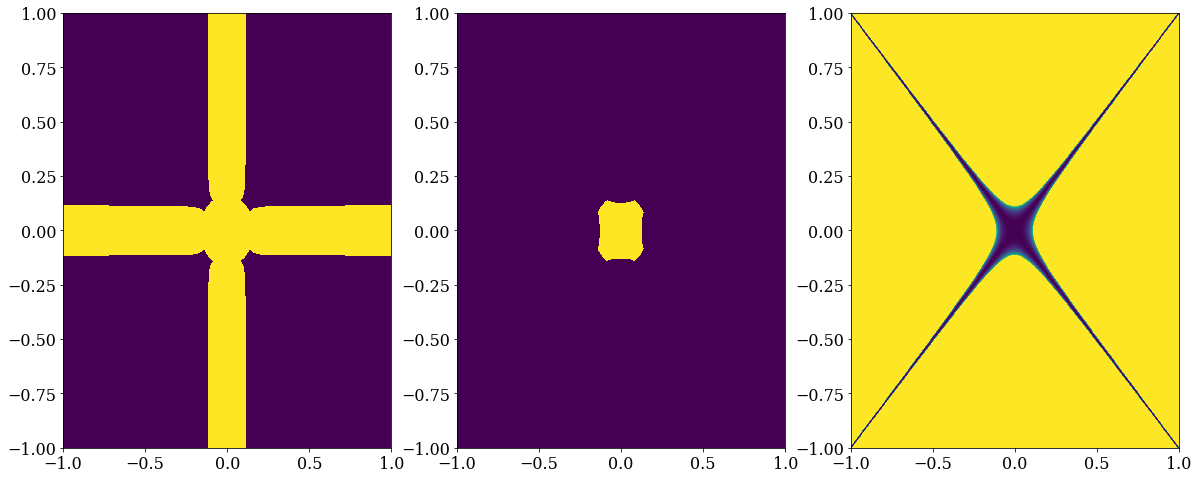

0.2857142857142857


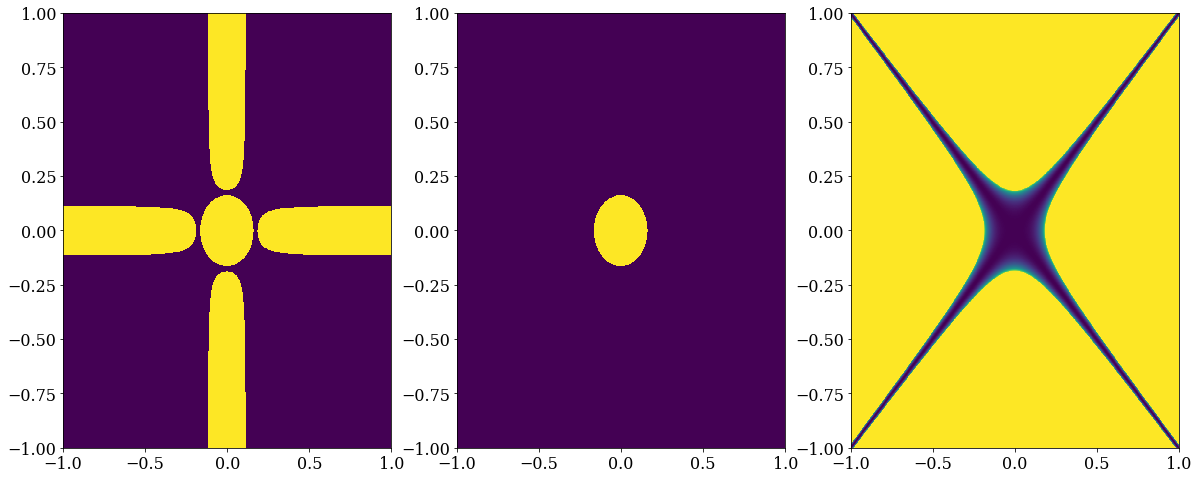

0.3571428571428571


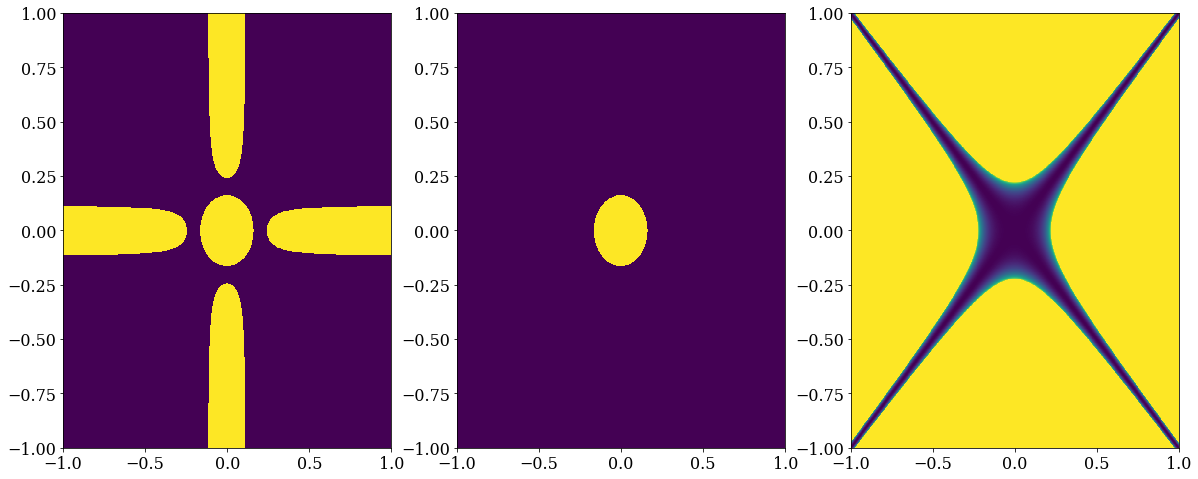

0.42857142857142855


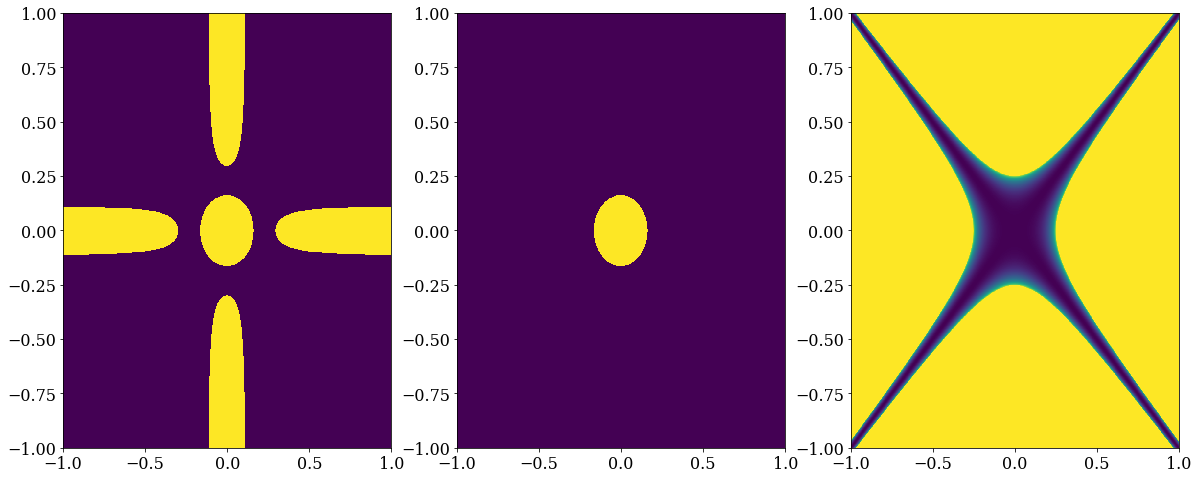

0.5


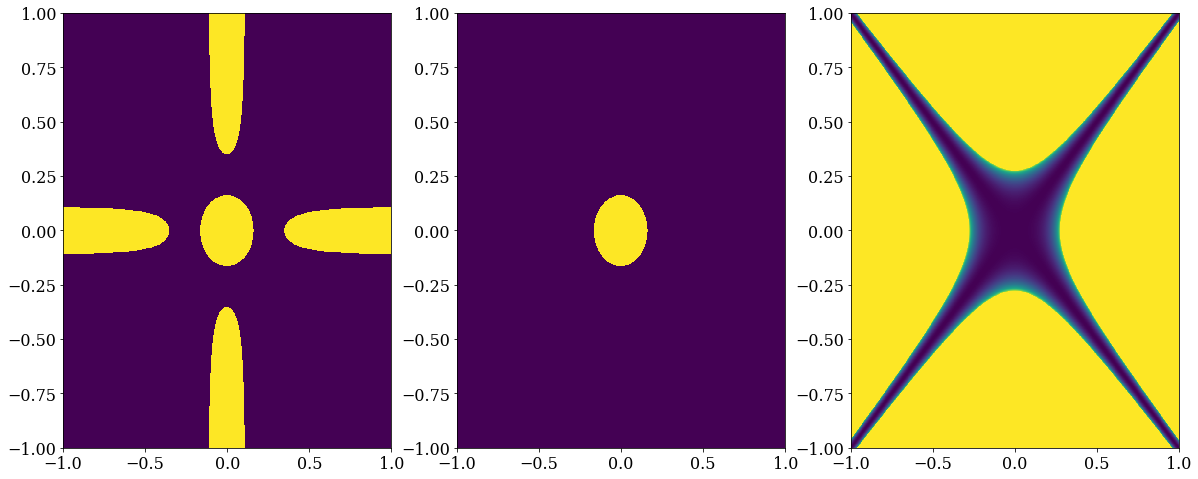

0.5714285714285714


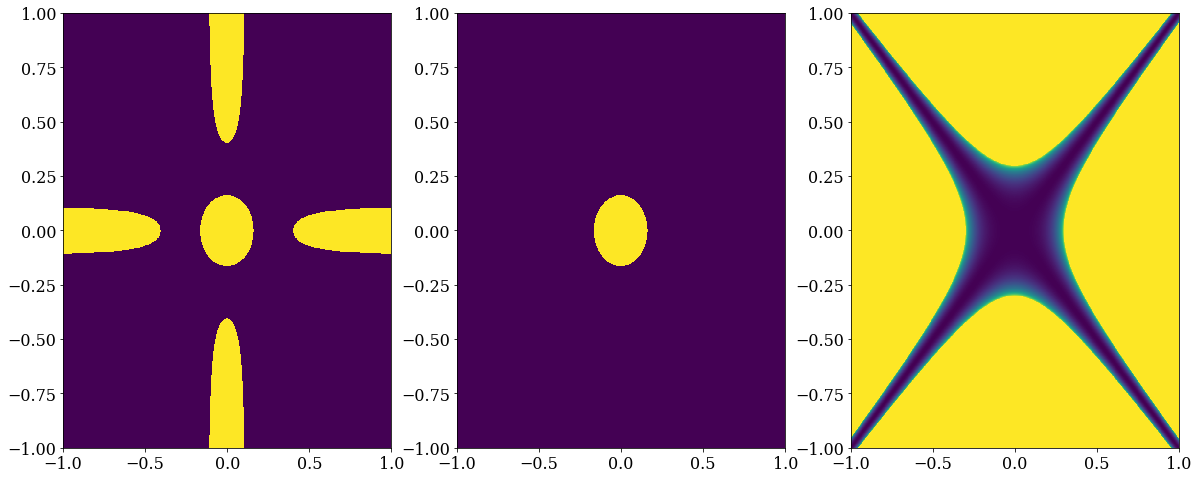

0.6428571428571428


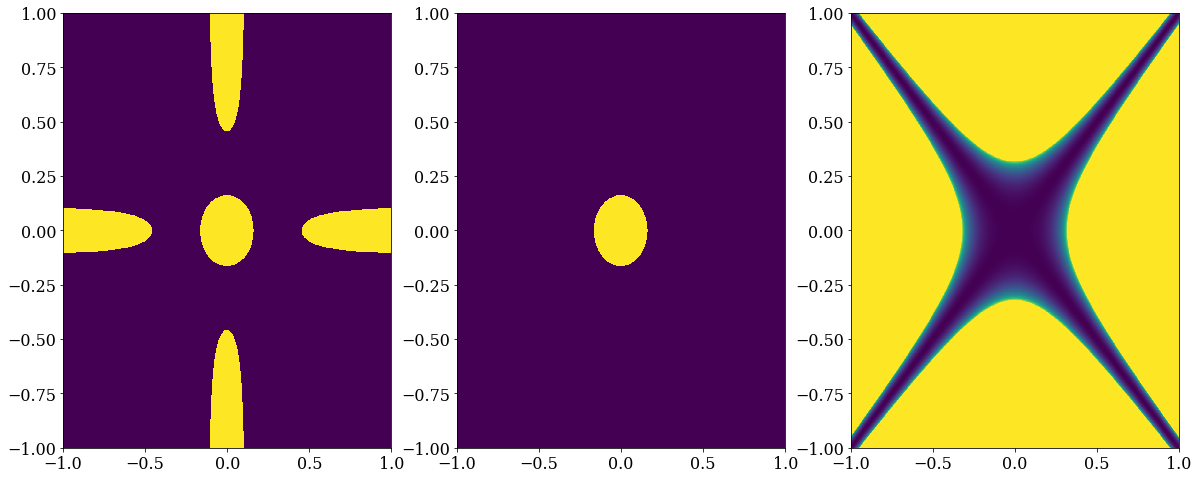

0.7142857142857142


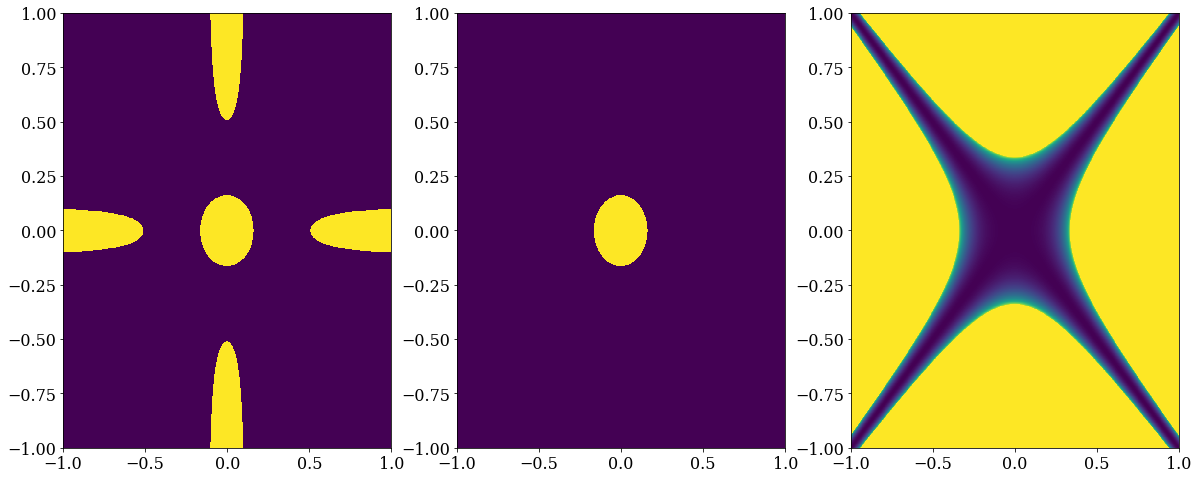

0.7857142857142857


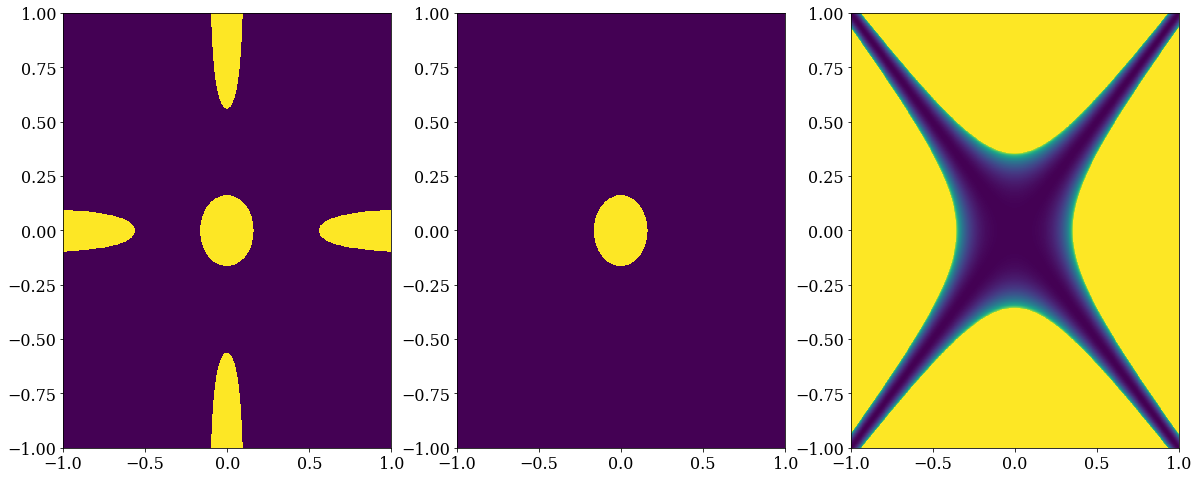

0.8571428571428571


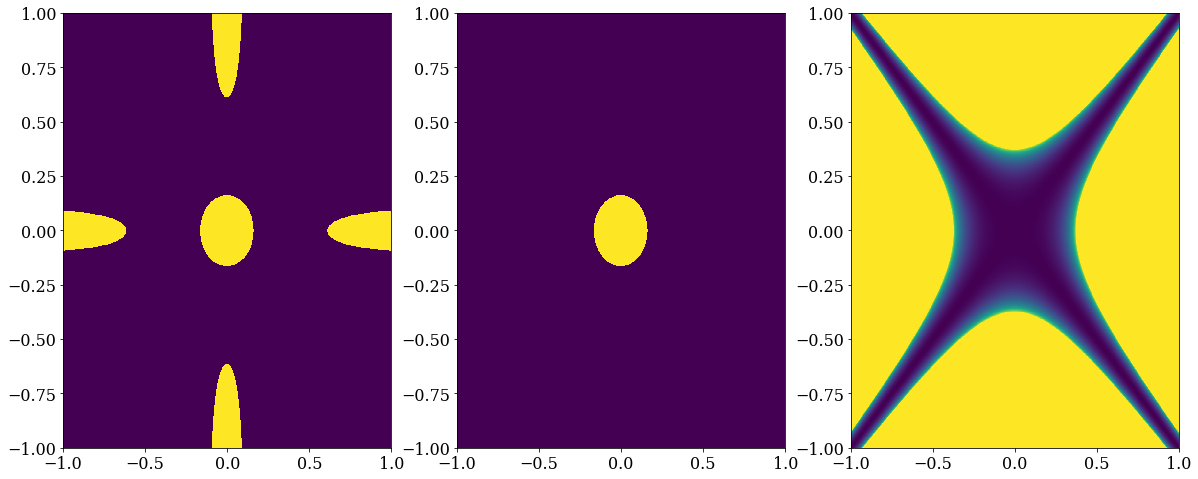

0.9285714285714285


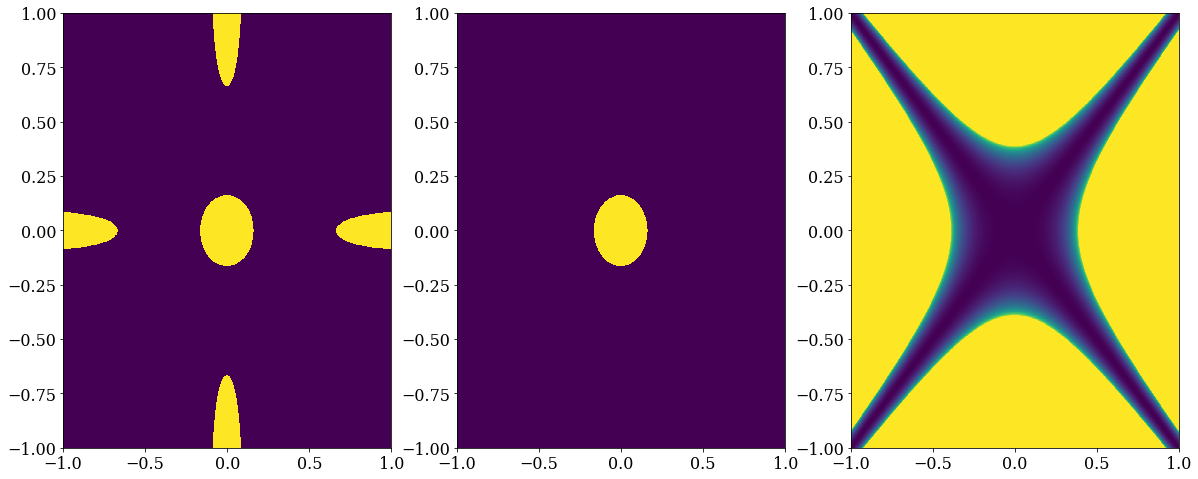

1.0


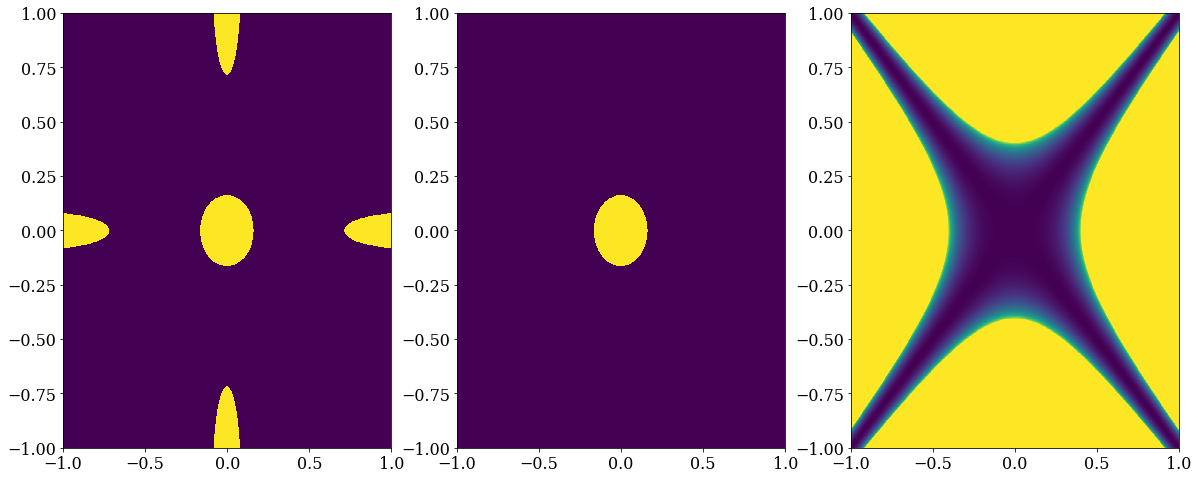

In [6]:
n = 1000
k = 1.
phi1 = np.linspace(-k, k, n)
phi2 = np.linspace(-k, k, n)
p = np.array(np.meshgrid(phi1, phi2))

c1 = .2
c2 = .2
x0 = -.2
c = np.matrix([[c1, -c1], [c2, -c2]])
x = np.array([x0, 0])

aa = np.linspace(0, 1., 15)

for a in aa:
    print(a)        
    fig, ax = plt.subplots(1, 3, figsize=(20, 8))
    Cr1 = (l1(p, a).real>0)
    Cr2 = (l2(p, a).real>0)
    Ci = l2(p, a).imag


    ax[0].pcolormesh(p[0], p[1], Cr1)
    ax[1].pcolormesh(p[0], p[1], Cr2)
    ax[2].pcolormesh(p[0], p[1], Ci)

    plt.show()